In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,add
from tensorflow.keras.models  import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import os

In [2]:
# Initializing VGG16 model
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
# include_top = False (loads full model without LAST fully connected layers) 


for layer in vgg.layers:
    layer.trainable = False #making all the layers non-trainable
    
    
# Flattening out the last layer    
x = Flatten()(vgg.output)


# Adding a dense layer
# To determine if the person is Healthy of Pneumonitic
predictions = Dense(2,activation='softmax')(x) 


model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
# Getting current directory
base_dir = os.getcwd() 

# Defining the input shape
target_shape = (224,224) 

train_dir = base_dir+"\\chest_xray\\train" # 
val_dir = base_dir+"\\chest_xray\\val"     # -- Directories for data
test_dir = base_dir+"\\chest_xray\\test"   # 

In [4]:
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in vgg.layers:
    layer.trainable = False # Making all the layers non-trainable

In [5]:
# Flattening out the last layer

x = Flatten()(vgg.output) 
predictions = Dense(2,activation='softmax')(x) #Dense layer to predict wether their is pneumonia or not
model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [7]:
# Making the data loader for training data
train_gen = ImageDataGenerator(rescale=1/255.0,
                               horizontal_flip=True,
                               zoom_range=0.2,
                               shear_range=0.2) 


# Making the data loader for validation data
test_gen = ImageDataGenerator(rescale=1/255.0) 


# Function to make iterable object for training
train_data_gen = train_gen.flow_from_directory(train_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

# Function to make iterable object for training
test_data_gen = train_gen.flow_from_directory(test_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit_generator(train_data_gen,
        steps_per_epoch=20,
        epochs=20,
        validation_data=test_data_gen,
        validation_steps=10)

C:\Users\THARUN\AppData\Local\Temp\ipykernel_10392\2269393949.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data_gen,


Epoch 1/20
20/20 [==============================] - 71s 4s/step - loss: 0.4894 - accuracy: 0.8125 - val_loss: 0.3573 - val_accuracy: 0.8562
Epoch 2/20
20/20 [==============================] - 72s 4s/step - loss: 0.3122 - accuracy: 0.8875 - val_loss: 1.0173 - val_accuracy: 0.7063
Epoch 3/20
20/20 [==============================] - 72s 4s/step - loss: 0.1924 - accuracy: 0.9187 - val_loss: 0.2454 - val_accuracy: 0.9062
Epoch 4/20
20/20 [==============================] - 72s 4s/step - loss: 0.1886 - accuracy: 0.9312 - val_loss: 0.6585 - val_accuracy: 0.7688
Epoch 5/20
20/20 [==============================] - 72s 4s/step - loss: 0.1681 - accuracy: 0.9312 - val_loss: 0.5401 - val_accuracy: 0.8000
Epoch 6/20
20/20 [==============================] - 72s 4s/step - loss: 0.1483 - accuracy: 0.9281 - val_loss: 0.5489 - val_accuracy: 0.8000
Epoch 7/20
20/20 [==============================] - 73s 4s/step - loss: 0.1216 - accuracy: 0.9500 - val_loss: 0.5291 - val_accuracy: 0.8500
Epoch 8/20
20/20 [==

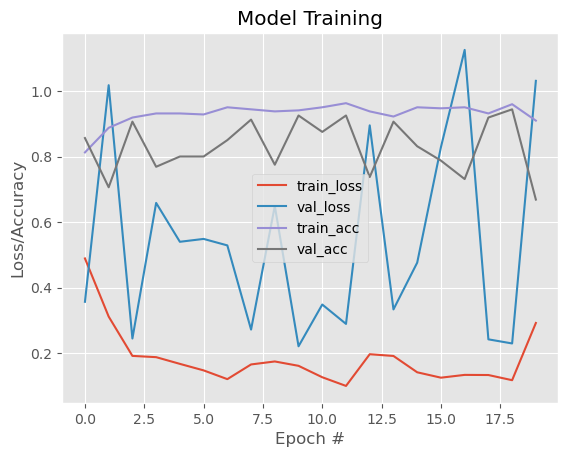

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot(hist.history["accuracy"], label="train_acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.title("Model Training")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("epochs.png")

In [11]:
#model.save('model.h5')